<a href="https://colab.research.google.com/github/map72ru/matalg/blob/main/%D0%94%D0%976.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np
from sklearn.datasets import load_diabetes

In [2]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)    

def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
        
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)            
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
        trees.append(tree)
        
    return trees

In [3]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
# Шаг
eta = 0.1
data = []

for n_trees in range(10, 100, 10):
  for tree_depth in range(5, 50, 5):
    print(f"trees: {n_trees} depth: {tree_depth}")
    coefs = [1] * n_trees
    trees = gb_fit(n_trees, tree_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    train_err = mean_squared_error(y_train, train_prediction)
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    test_err = mean_squared_error(y_test, test_prediction)

    data.append([n_trees, tree_depth, train_err, test_err])

trees: 10 depth: 5
trees: 10 depth: 10
trees: 10 depth: 15
trees: 10 depth: 20
trees: 10 depth: 25
trees: 10 depth: 30
trees: 10 depth: 35
trees: 10 depth: 40
trees: 10 depth: 45
trees: 20 depth: 5
trees: 20 depth: 10
trees: 20 depth: 15
trees: 20 depth: 20
trees: 20 depth: 25
trees: 20 depth: 30
trees: 20 depth: 35
trees: 20 depth: 40
trees: 20 depth: 45
trees: 30 depth: 5
trees: 30 depth: 10
trees: 30 depth: 15
trees: 30 depth: 20
trees: 30 depth: 25
trees: 30 depth: 30
trees: 30 depth: 35
trees: 30 depth: 40
trees: 30 depth: 45
trees: 40 depth: 5
trees: 40 depth: 10
trees: 40 depth: 15
trees: 40 depth: 20
trees: 40 depth: 25
trees: 40 depth: 30
trees: 40 depth: 35
trees: 40 depth: 40
trees: 40 depth: 45
trees: 50 depth: 5
trees: 50 depth: 10
trees: 50 depth: 15
trees: 50 depth: 20
trees: 50 depth: 25
trees: 50 depth: 30
trees: 50 depth: 35
trees: 50 depth: 40
trees: 50 depth: 45
trees: 60 depth: 5
trees: 60 depth: 10
trees: 60 depth: 15
trees: 60 depth: 20
trees: 60 depth: 25
trees:

In [ ]:
print(data)

NameError: ignored

In [5]:
np.array(data)

array([[1.00000000e+01, 5.00000000e+00, 4.63994263e+03, 7.17428193e+03],
       [1.00000000e+01, 1.00000000e+01, 3.60752152e+03, 6.99611466e+03],
       [1.00000000e+01, 1.50000000e+01, 3.43023795e+03, 7.25628751e+03],
       [1.00000000e+01, 2.00000000e+01, 3.42049931e+03, 7.71908155e+03],
       [1.00000000e+01, 2.50000000e+01, 3.42049931e+03, 7.71908155e+03],
       [1.00000000e+01, 3.00000000e+01, 3.42049931e+03, 7.71908155e+03],
       [1.00000000e+01, 3.50000000e+01, 3.42049931e+03, 7.71908155e+03],
       [1.00000000e+01, 4.00000000e+01, 3.42049931e+03, 7.71908155e+03],
       [1.00000000e+01, 4.50000000e+01, 3.42049931e+03, 7.71908155e+03],
       [2.00000000e+01, 5.00000000e+00, 1.29235374e+03, 4.14065621e+03],
       [2.00000000e+01, 1.00000000e+01, 4.52374866e+02, 4.55420133e+03],
       [2.00000000e+01, 1.50000000e+01, 4.17974148e+02, 5.04526758e+03],
       [2.00000000e+01, 2.00000000e+01, 4.15852863e+02, 5.56262586e+03],
       [2.00000000e+01, 2.50000000e+01, 4.15852863e

In [ ]:
i = 0
j = 0
k = 0
Z = np.empty([9,9])
Z2 = np.empty([9,9])
while k < len(data):
  Z[j, i] = data[k][2]
  Z2[j, i] = data[i*9+j][2]
  k += 1
  if k % 9 == 0:
    i = 0
    j += 1
  else:
    i += 1

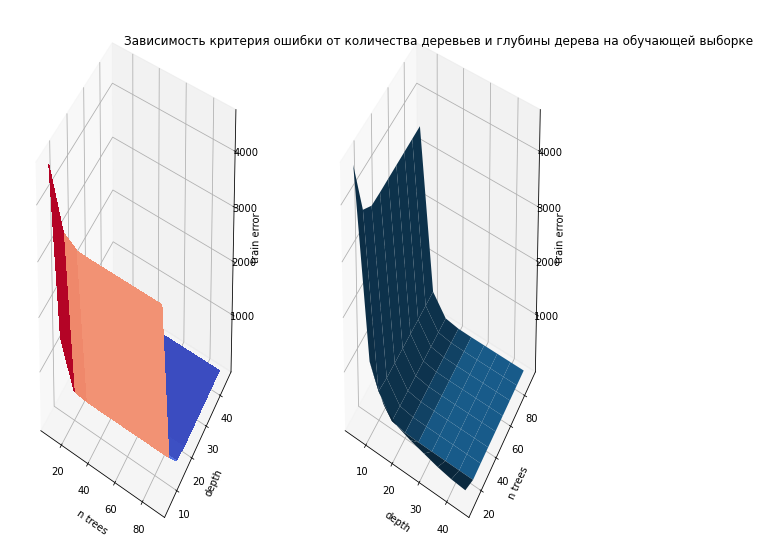

In [52]:
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
from matplotlib import cm

X = np.arange(10, 100, 10)
Y = np.arange(5, 50, 5)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 2, 1, projection='3d')

X1, Y1 = np.meshgrid(X, Y)
ax.plot_surface(X1, Y1, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('n trees')
ax.set_ylabel('depth')
ax.set_zlabel('train error')

ax = fig.add_subplot(1, 2, 2, projection='3d')

Y2, X2 = np.meshgrid(Y, X)
ax.plot_surface(Y2, X2, Z2)

ax.set_ylabel('n trees')
ax.set_xlabel('depth')
ax.set_zlabel('train error')
plt.title('Зависимость критерия ошибки от количества деревьев и глубины дерева на обучающей выборке')
plt.show()



In [54]:
i = 0
j = 0
k = 0
Z = np.empty([9,9])
Z3 = np.empty([9,9])
while k < len(data):
  Z[j, i] = data[k][3]
  Z3[j, i] = data[i*9+j][3]
  k += 1
  if k % 9 == 0:
    i = 0
    j += 1
  else:
    i += 1

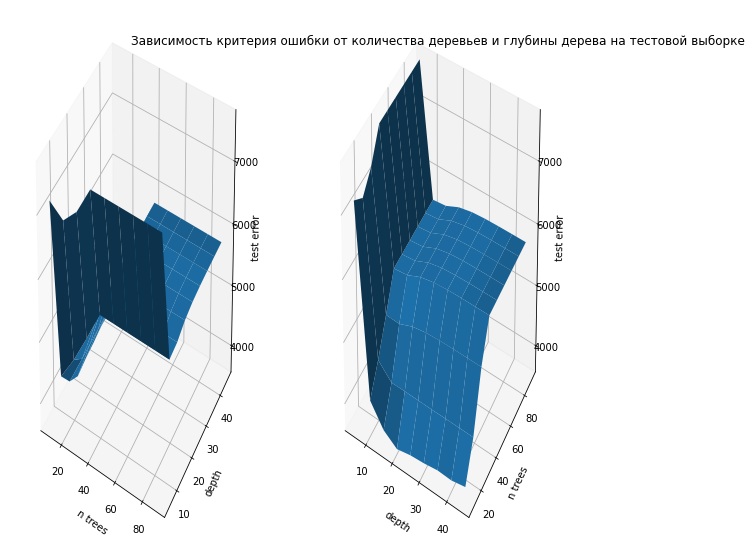

In [66]:
X = np.arange(10, 100, 10)
Y = np.arange(5, 50, 5)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 2, 1, projection='3d')

X1, Y1 = np.meshgrid(X, Y)
ax.plot_surface(X1, Y1, Z)

ax.set_xlabel('n trees')
ax.set_ylabel('depth')
ax.set_zlabel('test error')

ax = fig.add_subplot(1, 2, 2, projection='3d')

Y3, X3 = np.meshgrid(Y, X)
ax.plot_surface(Y3, X3, Z3)

ax.set_ylabel('n trees')
ax.set_xlabel('depth')
ax.set_zlabel('test error')

plt.title('Зависимость критерия ошибки от количества деревьев и глубины дерева на тестовой выборке')
plt.show()

Выводы:
1.   Данный алгоритм склонен к переобучению при большом количестве деревьев и/или их глубине
2.   Оптимальное значение гиперпараметров для данной выборке составляет 40 деревьев при глубине дерева 5